In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

plt.style.use('ggplot')

In [2]:
SIZE = 200

np.random.seed(2000)

x1 = np.random.randint(-500, 500, SIZE)
x2 = np.random.randint(-500, 500, SIZE)

Xs = np.column_stack([x1, x2])
Xs

array([[ 450,  221],
       [ 340, -314],
       [-294, -298],
       [ 473,  116],
       [  66, -196],
       [ 135, -383],
       [ 496, -494],
       [-216,  378],
       [ -88, -474],
       [ 190,  246],
       [-317, -257],
       [-486, -418],
       [ -16,   55],
       [  27,  208],
       [ 103, -101],
       [ 206,  389],
       [  55, -140],
       [  13,  153],
       [-232, -494],
       [ 490, -379],
       [ 419,  -56],
       [ 435, -293],
       [ 229,  298],
       [ 313,   22],
       [-376, -348],
       [-121, -193],
       [ -88, -124],
       [ -20,  106],
       [ 438,  321],
       [  66, -183],
       [ 365,  255],
       [  83,  193],
       [-459,  -83],
       [  16,  -75],
       [ 284,   87],
       [ -70,  477],
       [   9,  -84],
       [-308,  280],
       [ -49, -437],
       [ 276, -395],
       [  75, -332],
       [ 486,   67],
       [-209,  167],
       [-114, -372],
       [ 412,  349],
       [ -84,  372],
       [-448, -274],
       [ -41,

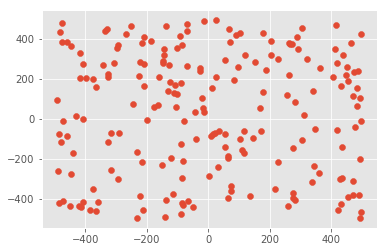

In [3]:
plt.scatter(Xs[:, 0], Xs[:, 1])

In [4]:
def condi(X):
    x, y = X
    return [1, 0] if x * y > 150 and x > 100 else [0, 1]


In [5]:
cls = np.array([condi(X) for X in Xs])

Xs = np.column_stack([Xs, cls])

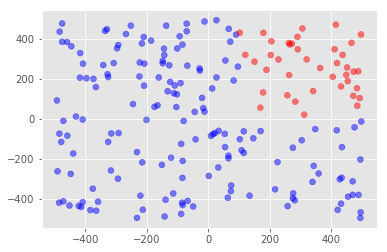

In [6]:
plt.scatter(Xs[:, 0], Xs[:, 1], c=['red' if c == 1 else 'blue' for c in Xs[:, 2]], alpha=.5)

In [7]:
idx = np.random.rand(SIZE) < .75
idx[:10]

array([ True,  True,  True, False, False,  True,  True,  True,  True,  True], dtype=bool)

In [8]:
tr_set = Xs[idx]
te_set = Xs[np.logical_not(idx)]

In [9]:
len(tr_set), len(te_set)

(137, 63)

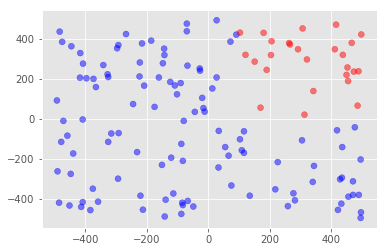

In [10]:
plt.scatter(tr_set[:, 0], tr_set[:, 1], c=['red' if c == 1 else 'blue' for c in tr_set[:, 2]], alpha=.5)

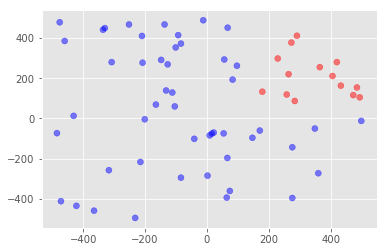

In [11]:
plt.scatter(te_set[:, 0], te_set[:, 1], c=['red' if c == 1 else 'blue' for c in te_set[:, 2]], alpha=.5)

In [12]:
class data:
    def __init__(self):
        self.n = 1000
        self.r = 1000
        
        def condi(X):
            x, y = X
            return np.array([1, 0]) if x * y < 160000 else np.array([0, 1])
        
        x1 = np.random.randint(0, self.r, self.n)
        x2 = np.random.randint(0, self.r, self.n)
        Xs = np.column_stack([x1, x2])
        
        cls = np.array([condi(X) for X in Xs])
        Xs = np.column_stack([Xs, cls])
        
        idx = np.random.rand(self.n) < .75
        
        self.train = Xs[idx]
        self.test = Xs[np.logical_not(idx)]
    
    def getTest(self):
        return self.test[:, :2], self.test[:, 2:]
    
    def nextBatch(self, size):
        idxs = np.random.randint(0, len(self.train), size)
        return self.train[idxs, :2], self.train[idxs, 2:]

# class data:
#     def __init__(self):
#         self.n = 1000
#         FUNC = lambda xs: [1., 0.] if xs[0] * xs[1] < 100000. else [0., 1.]
#         train_Xs = np.array(zip(np.random.random(self.n) * 1000, np.random.random(self.n) * 1000))
#         train_ys = np.apply_along_axis(FUNC, 1, train_Xs)

#         test_Xs = np.array(zip(np.random.random(self.n) * 1000, np.random.random(self.n) * 1000))
#         test_ys = np.apply_along_axis(FUNC, 1, test_Xs)

#         self.train = np.array([train_Xs, train_ys])
#         self.test = np.array([test_Xs, test_ys])
    
#     def getTest(self):
#         return self.test
    
#     def nextBatch(self):
#         idxs = np.random.randint(0, self.n, 20)
#         return self.train[:, idxs]

In [13]:
dat = data()

In [14]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
batch_size = 20
display_step = 100

# Network Parameters
n_hidden_1 = 2 # 1st layer number of features
n_hidden_2 = 2 # 2nd layer number of features
n_input = 2 # MNIST data input (img shape: 28*28)
n_classes = 2 # MNIST total classes (0-9 digits)

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [15]:
# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
#     layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
#     layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    return out_layer

In [16]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h4': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_2])),
    'b4': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = multilayer_perceptron(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

In [17]:
# Launch the graph
sess = tf.InteractiveSession()
sess.run(init)

# Training cycle
for epoch in range(training_epochs):
    avg_cost = 0.
    total_batch = int(dat.n/batch_size)
    # Loop over all batches
    for i in range(total_batch):
        batch_x, batch_y = dat.nextBatch(batch_size)
        # Run optimization op (backprop) and cost op (to get loss value)
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                      y: batch_y})
        # Compute average loss
        avg_cost += c / total_batch
    # Display logs per epoch step
    if epoch % display_step == 0:
        print "Epoch:", '%04d' % (epoch+1), "cost=", \
            "{:.9f}".format(avg_cost)
print "Optimization Finished!"

# Test model
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
xs, ys = dat.getTest()
print "Accuracy:", accuracy.eval({x: xs, y: ys})

Epoch: 0001 cost= 17.551162766
Epoch: 0101 cost= 0.239436758
Epoch: 0201 cost= 0.206701414
Epoch: 0301 cost= 0.202050812
Epoch: 0401 cost= 0.223719181
Epoch: 0501 cost= 0.255877554
Epoch: 0601 cost= 0.236741787
Epoch: 0701 cost= 0.224368600
Epoch: 0801 cost= 0.242142057
Epoch: 0901 cost= 0.206762205
Optimization Finished!
Accuracy: 0.877119


In [18]:
prediction = tf.argmax(pred, 1)
guesses = prediction.eval({x: dat.getTest()[0]})

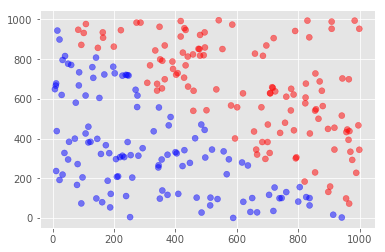

In [19]:
tset = dat.getTest()[0]
plt.scatter(tset[:, 0], tset[:, 1], c=['red' if c == 1 else 'blue' for c in guesses], alpha=.5)

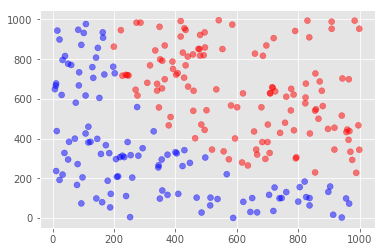

In [20]:
tset = dat.getTest()[0]
plt.scatter(tset[:, 0], tset[:, 1], c=['red' if c == 0 else 'blue' for c in dat.getTest()[1][ :, 0]], alpha=.5)